### Test area
WebbPSF CGI test

Populating the interactive namespace from numpy and matplotlib
WebbPSF log messages of level INFO and above will be shown.
WebbPSF log outputs will be directed to the screen.
[webbpsf] Set the following optical configuration:
[webbpsf] camera = IFS, filter = F770, apodizer = CHARSPC, fpm = CHARSPC_F770_BOWTIE, lyotstop = LS30D88


[  poppy] Pysynphot unavailable (or invalid source supplied)!   Assuming flat # of counts versus wavelength.
[  poppy] CAUTION: Just interpolating rather than integrating filter profile, over 1 steps


[  poppy] PSF calc using fov_arcsec = 1.600000, oversample = 4, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: Roman+CGI
[  poppy] Roman Entrance Pupil: Loaded amplitude transmission from /home/marken/GitHub/webbpsf_data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: Roman Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC: Loaded amplitude transmission from /home/marken/GitHub/webbpsf_data/CGI/optics/CHARSPC_SP_256pix.fits.gz
[  poppy] Added pupil plane: CHARSPC
[  poppy] Added pupil plane: DM
[  poppy] CHARSPC_F770_BOWTIE: Loaded amplitude transmission from /home/marken/GitHub/webbpsf_data/CGI/optics/CHARSPC_FPM_25WA90_2x65deg_-_FP1res4_evensamp_D072_F770.fits.gz
[  poppy] Added image plane: CHARSPC_F770_BOWTIE
[  poppy] LS30D88: Loaded amplitude transmission from /home/marken/GitHub/webbpsf_data/CGI/optics/SPC_LS_30D88_256pix.fits.gz
[  poppy] Added pupil plane: LS3

[  poppy] Pysynphot unavailable (or invalid source supplied)!   Assuming flat # of counts versus wavelength.
[  poppy] CAUTION: Just interpolating rather than integrating filter profile, over 1 steps


[  poppy] PSF calc using fov_arcsec = 1.600000, oversample = 4, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: Roman+CGI
[  poppy] Roman Entrance Pupil: Loaded amplitude transmission from /home/marken/GitHub/webbpsf_data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: Roman Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC: Loaded amplitude transmission from /home/marken/GitHub/webbpsf_data/CGI/optics/CHARSPC_SP_256pix.fits.gz
[  poppy] Added pupil plane: CHARSPC
[  poppy] Added pupil plane: DM
[  poppy] LS30D88: Loaded amplitude transmission from /home/marken/GitHub/webbpsf_data/CGI/optics/SPC_LS_30D88_256pix.fits.gz
[  poppy] Added pupil plane: LS30D88
[  poppy] Initialized OpticalSystem: unnamed system
[  poppy] Added detector with pixelscale=0.025 and oversampling=4: CGI detector
[  poppy] Calculating PSF with 1 wavelengths
[  poppy]  Propagating wavelength = 7.7e-

[  poppy] Pysynphot unavailable (or invalid source supplied)!   Assuming flat # of counts versus wavelength.
[  poppy] CAUTION: Just interpolating rather than integrating filter profile, over 1 steps


[  poppy] PSF calc using fov_arcsec = 1.600000, oversample = 4, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: Roman+CGI
[  poppy] Roman Entrance Pupil: Loaded amplitude transmission from /home/marken/GitHub/webbpsf_data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: Roman Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC: Loaded amplitude transmission from /home/marken/GitHub/webbpsf_data/CGI/optics/CHARSPC_SP_256pix.fits.gz
[  poppy] Added pupil plane: CHARSPC
[  poppy] Added pupil plane: DM
[  poppy] CHARSPC_F770_BOWTIE: Loaded amplitude transmission from /home/marken/GitHub/webbpsf_data/CGI/optics/CHARSPC_FPM_25WA90_2x65deg_-_FP1res4_evensamp_D072_F770.fits.gz
[  poppy] Added image plane: CHARSPC_F770_BOWTIE
[  poppy] LS30D88: Loaded amplitude transmission from /home/marken/GitHub/webbpsf_data/CGI/optics/SPC_LS_30D88_256pix.fits.gz
[  poppy] Added pupil plane: LS3

/home/marken/GitHub/webbpsf/webbpsf/roman.py:888: RuntimeWarning: divide by zero encountered in true_divide
  section = np.abs((newy - yc) / (newx - xc)) < np.arctan(angle)
/home/marken/GitHub/webbpsf/webbpsf/roman.py:888: RuntimeWarning: invalid value encountered in true_divide
  section = np.abs((newy - yc) / (newx - xc)) < np.arctan(angle)


4.540177726737013e-07

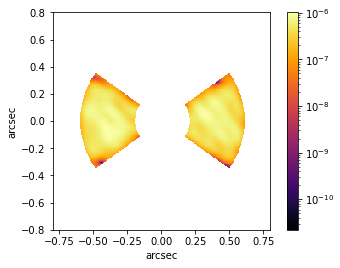

In [1]:
%pylab inline --no-import-all
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['image.interpolation'] = 'nearest'

import os
os.environ['WEBBPSF_PATH'] = '/home/marken/GitHub/webbpsf_data'
import webbpsf
from webbpsf import roman
import ipywidgets
from astropy.io import fits

webbpsf.setup_logging()

DM_on = roman.CGI(mode='CHARSPC_F770')
DM_on.dm1.set_actuator(4, 8, 1e-6)
DM_on.dm1.set_actuator(44, 40, 1e-6)

DM_on.raw_contrast()

In [2]:
from pastis.config import CONFIG_PASTIS
from pastis.hockeystick_contrast_curve import hockeystick_curve
from pastis.matrix_building_numerical import MatrixIntensityRST
from pastis.pastis_analysis import run_full_pastis_analysis
import pastis.util as util

run_matrix = MatrixIntensityRST(initial_path=CONFIG_PASTIS.get('local', 'local_data_path'))

/home/marken/GitHub/pastis_data

[   root] LOG SETUP: Console will display messages of INFO or higher
2021-05-28 15:52:23,126 - root - INFO - LOG SETUP: Console will display messages of INFO or higher
[   root] LOG SETUP: Experiment log will save messages of INFO or higher to /home/marken/GitHub/pastis_data/2021-05-28T15-52-23_rst/matrix_numerical/pastis_matrix_rst.log
2021-05-28 15:52:23,137 - root - INFO - LOG SETUP: Experiment log will save messages of INFO or higher to /home/marken/GitHub/pastis_data/2021-05-28T15-52-23_rst/matrix_numerical/pastis_matrix_rst.log
[   root] Building numerical matrix for rst

2021-05-28 15:52:23,144 - root - INFO - Building numerical matrix for rst

[   root] Instrument: rst
2021-05-28 15:52:23,152 - root - INFO - Instrument: rst
[   root] Wavelength: 7.7e-07 m
2021-05-28 15:52:23,154 - root - INFO - Wavelength: 7.7e-07 m
[   root] Number of segments: 2304
2021-05-28 15:52:23,164 - root - INFO - Number of segments: 2304
[   root] Segment list: [   0  

WebbPSF log messages of level INFO and above will be shown.
WebbPSF log outputs will be directed to the screen.
[webbpsf] Set the following optical configuration:
[webbpsf] camera = IFS, filter = F770, apodizer = CHARSPC, fpm = CHARSPC_F770_BOWTIE, lyotstop = LS30D88


[  poppy] Pysynphot unavailable (or invalid source supplied)!   Assuming flat # of counts versus wavelength.
[  poppy] CAUTION: Just interpolating rather than integrating filter profile, over 1 steps


[  poppy] PSF calc using fov_arcsec = 1.600000, oversample = 4, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: Roman+CGI
[  poppy] Roman Entrance Pupil: Loaded amplitude transmission from /home/marken/GitHub/webbpsf_data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: Roman Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC: Loaded amplitude transmission from /home/marken/GitHub/webbpsf_data/CGI/optics/CHARSPC_SP_256pix.fits.gz
[  poppy] Added pupil plane: CHARSPC
[  poppy] Added pupil plane: DM
[  poppy] LS30D88: Loaded amplitude transmission from /home/marken/GitHub/webbpsf_data/CGI/optics/SPC_LS_30D88_256pix.fits.gz
[  poppy] Added pupil plane: LS30D88
[  poppy] Initialized OpticalSystem: unnamed system
[  poppy] Added detector with pixelscale=0.025 and oversampling=4: CGI detector
[  poppy] Calculating PSF with 1 wavelengths
[  poppy]  Propagating wavelength = 7.7e-

[  poppy] Pysynphot unavailable (or invalid source supplied)!   Assuming flat # of counts versus wavelength.
[  poppy] CAUTION: Just interpolating rather than integrating filter profile, over 1 steps


[  poppy] PSF calc using fov_arcsec = 1.600000, oversample = 4, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: Roman+CGI
[  poppy] Roman Entrance Pupil: Loaded amplitude transmission from /home/marken/GitHub/webbpsf_data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: Roman Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC: Loaded amplitude transmission from /home/marken/GitHub/webbpsf_data/CGI/optics/CHARSPC_SP_256pix.fits.gz
[  poppy] Added pupil plane: CHARSPC
[  poppy] Added pupil plane: DM
[  poppy] CHARSPC_F770_BOWTIE: Loaded amplitude transmission from /home/marken/GitHub/webbpsf_data/CGI/optics/CHARSPC_FPM_25WA90_2x65deg_-_FP1res4_evensamp_D072_F770.fits.gz
[  poppy] Added image plane: CHARSPC_F770_BOWTIE
[  poppy] LS30D88: Loaded amplitude transmission from /home/marken/GitHub/webbpsf_data/CGI/optics/SPC_LS_30D88_256pix.fits.gz
[  poppy] Added pupil plane: LS3

[matplotlib.font_manager] findfont: score(<Font 'Tlwg Typist' (TlwgTypist-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
[matplotlib.font_manager] findfont: score(<Font 'Mukti Narrow' (MuktiNarrow.ttf) normal normal 400 normal>) = 10.05
[matplotlib.font_manager] findfont: score(<Font 'KacstTitle' (KacstTitle.ttf) normal normal 500 normal>) = 10.145
[matplotlib.font_manager] findfont: score(<Font 'Manjari' (Manjari-Thin.otf) normal normal 100 normal>) = 10.335
[matplotlib.font_manager] findfont: score(<Font 'Liberation Mono' (LiberationMono-Bold.ttf) normal normal 700 normal>) = 10.335
[matplotlib.font_manager] findfont: score(<Font 'Tlwg Typist' (TlwgTypist-Oblique.ttf) oblique normal 400 normal>) = 11.05
[matplotlib.font_manager] findfont: score(<Font 'P052' (P052-Bold.otf) normal normal 700 normal>) = 10.335
[matplotlib.font_manager] findfont: score(<Font 'Suruma' (Suruma.ttf) normal normal 500 normal>) = 10.145
[matplotlib.font_manager] findfont: score(<Font 'Nimbus Sans' (Ni

[matplotlib.font_manager] findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.33499999999999996
[matplotlib.font_manager] findfont: score(<Font 'Liberation Serif' (LiberationSerif-Bold.ttf) normal normal 700 normal>) = 10.335
[matplotlib.font_manager] findfont: score(<Font 'Liberation Sans' (LiberationSans-Bold.ttf) normal normal 700 normal>) = 10.335
[matplotlib.font_manager] findfont: score(<Font 'Liberation Sans' (LiberationSans-BoldItalic.ttf) italic normal 700 normal>) = 11.335
[matplotlib.font_manager] findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 10.335
[matplotlib.font_manager] findfont: score(<Font 'KacstBook' (KacstBook.ttf) normal normal 500 normal>) = 10.145
[matplotlib.font_manager] findfont: score(<Font 'Yrsa' (Yrsa-Bold.ttf) normal normal 700 normal>) = 10.335
[matplotlib.font_manager] findfont: score(<Font 'Garuda' (Garuda-Oblique.ttf) oblique normal 400 normal>) = 11.05
[matplotlib.f

[matplotlib.font_manager] findfont: score(<Font 'Liberation Mono' (LiberationMono-Italic.ttf) italic normal 400 normal>) = 11.05
[matplotlib.font_manager] findfont: score(<Font 'Liberation Sans' (LiberationSans-Regular.ttf) normal normal 400 normal>) = 10.05
[matplotlib.font_manager] findfont: score(<Font 'Lohit Gurmukhi' (Lohit-Gurmukhi.ttf) normal normal 400 normal>) = 10.05
[matplotlib.font_manager] findfont: score(<Font 'Gayathri' (Gayathri-Thin.otf) normal normal 100 normal>) = 10.335
[matplotlib.font_manager] findfont: score(<Font 'Rasa' (Rasa-Medium.ttf) normal normal 500 normal>) = 10.145
[matplotlib.font_manager] findfont: score(<Font 'Samyak Malayalam' (Samyak-Malayalam.ttf) normal normal 400 normal>) = 10.05
[matplotlib.font_manager] findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Italic.ttf) italic normal 400 condensed>) = 11.25
[matplotlib.font_manager] findfont: score(<Font 'Tlwg Mono' (TlwgMono-Bold.ttf) normal normal 700 normal>) = 10.335
[matplotli

[matplotlib.font_manager] findfont: score(<Font 'URW Gothic' (URWGothic-Book.otf) normal normal 400 normal>) = 10.05
[matplotlib.font_manager] findfont: score(<Font 'Manjari' (Manjari-Bold.otf) normal normal 700 normal>) = 10.335
[matplotlib.font_manager] findfont: score(<Font 'Tlwg Typo' (TlwgTypo-Oblique.ttf) oblique normal 400 normal>) = 11.05
[matplotlib.font_manager] findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Regular.otf) normal normal 400 condensed>) = 10.25
[matplotlib.font_manager] findfont: score(<Font 'Liberation Serif' (LiberationSerif-Italic.ttf) italic normal 400 normal>) = 11.05
[matplotlib.font_manager] findfont: score(<Font 'FreeSans' (FreeSansBoldOblique.ttf) oblique normal 600 normal>) = 11.24
[matplotlib.font_manager] findfont: score(<Font 'URW Bookman' (URWBookman-Light.otf) normal normal 300 normal>) = 10.145
[matplotlib.font_manager] findfont: score(<Font 'Khmer OS System' (KhmerOSsys.ttf) normal normal 400 normal>) = 10.05
[matplotlib.font_manag

[  poppy] Pysynphot unavailable (or invalid source supplied)!   Assuming flat # of counts versus wavelength.
[  poppy] CAUTION: Just interpolating rather than integrating filter profile, over 1 steps


[  poppy] PSF calc using fov_arcsec = 1.600000, oversample = 4, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: Roman+CGI
[  poppy] Roman Entrance Pupil: Loaded amplitude transmission from /home/marken/GitHub/webbpsf_data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: Roman Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC: Loaded amplitude transmission from /home/marken/GitHub/webbpsf_data/CGI/optics/CHARSPC_SP_256pix.fits.gz
[  poppy] Added pupil plane: CHARSPC
[  poppy] Added pupil plane: DM
[  poppy] CHARSPC_F770_BOWTIE: Loaded amplitude transmission from /home/marken/GitHub/webbpsf_data/CGI/optics/CHARSPC_FPM_25WA90_2x65deg_-_FP1res4_evensamp_D072_F770.fits.gz
[  poppy] Added image plane: CHARSPC_F770_BOWTIE
[  poppy] LS30D88: Loaded amplitude transmission from /home/marken/GitHub/webbpsf_data/CGI/optics/SPC_LS_30D88_256pix.fits.gz
[  poppy] Added pupil plane: LS3

TypeError: object of type 'NoneType' has no len()

[matplotlib.font_manager] findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=17.28.
[matplotlib.font_manager] findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 10.335
[matplotlib.font_manager] findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
[matplotlib.font_manager] findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335
[matplotlib.font_manager] findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
[matplotlib.font_manager] findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
[matplotlib.font_manager] findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
[matplotlib.font_manager] findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.33499999999999996
[matplotlib.font

[matplotlib.font_manager] findfont: score(<Font 'FreeSans' (FreeSansBold.ttf) normal normal 600 normal>) = 10.24
[matplotlib.font_manager] findfont: score(<Font 'Loma' (Loma.ttf) normal normal 400 normal>) = 10.05
[matplotlib.font_manager] findfont: score(<Font 'Laksaman' (Laksaman-BoldItalic.ttf) italic normal 700 normal>) = 11.335
[matplotlib.font_manager] findfont: score(<Font 'Umpush' (Umpush-Bold.ttf) normal normal 700 normal>) = 10.335
[matplotlib.font_manager] findfont: score(<Font 'KacstFarsi' (KacstFarsi.ttf) normal normal 500 normal>) = 10.145
[matplotlib.font_manager] findfont: score(<Font 'Tlwg Typo' (TlwgTypo-Bold.ttf) normal normal 700 normal>) = 10.335
[matplotlib.font_manager] findfont: score(<Font 'Tlwg Typist' (TlwgTypist-Bold.ttf) normal normal 700 normal>) = 10.335
[matplotlib.font_manager] findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-BoldItalic.otf) italic normal 700 normal>) = 11.335
[matplotlib.font_manager] findfont: score(<Font 'Padauk' (Padauk-Regular.

[matplotlib.font_manager] findfont: score(<Font 'Purisa' (Purisa-Oblique.ttf) oblique normal 400 normal>) = 11.05
[matplotlib.font_manager] findfont: score(<Font 'Kinnari' (Kinnari-Oblique.ttf) oblique normal 400 normal>) = 11.05
[matplotlib.font_manager] findfont: score(<Font 'Keraleeyam' (Keraleeyam-Regular.ttf) normal normal 400 normal>) = 10.05
[matplotlib.font_manager] findfont: score(<Font 'Abyssinica SIL' (AbyssinicaSIL-Regular.ttf) normal normal 400 normal>) = 10.05
[matplotlib.font_manager] findfont: score(<Font 'KacstLetter' (KacstLetter.ttf) normal normal 500 normal>) = 10.145
[matplotlib.font_manager] findfont: score(<Font 'Liberation Mono' (LiberationMono-Bold.ttf) normal normal 700 normal>) = 10.335
[matplotlib.font_manager] findfont: score(<Font 'FreeMono' (FreeMonoOblique.ttf) oblique normal 400 normal>) = 11.05
[matplotlib.font_manager] findfont: score(<Font 'Sawasdee' (Sawasdee-Oblique.ttf) oblique normal 400 normal>) = 11.05
[matplotlib.font_manager] findfont: score(

[matplotlib.font_manager] findfont: score(<Font 'Kinnari' (Kinnari-Bold.ttf) normal normal 700 normal>) = 10.335
[matplotlib.font_manager] findfont: score(<Font 'Tlwg Mono' (TlwgMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
[matplotlib.font_manager] findfont: score(<Font 'AnjaliOldLipi' (AnjaliOldLipi-Regular.ttf) normal normal 400 normal>) = 10.05
[matplotlib.font_manager] findfont: score(<Font 'Nimbus Sans' (NimbusSans-BoldItalic.otf) italic normal 700 normal>) = 11.335
[matplotlib.font_manager] findfont: score(<Font 'Pothana2000' (Pothana2000.ttf) normal normal 400 normal>) = 10.05
[matplotlib.font_manager] findfont: score(<Font 'Garuda' (Garuda-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
[matplotlib.font_manager] findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
[matplotlib.font_manager] findfont: score(<Font 'Liberation Mono' (LiberationMono-Italic.ttf) italic normal 400 normal>) = 11.05
[matplotlib.font_manager] findf

[matplotlib.font_manager] findfont: score(<Font 'KacstQurn' (KacstQurn.ttf) normal normal 400 normal>) = 10.05
[matplotlib.font_manager] findfont: score(<Font 'Umpush' (Umpush-Oblique.ttf) oblique normal 400 normal>) = 11.05
[matplotlib.font_manager] findfont: score(<Font 'Likhan' (LikhanNormal.ttf) normal normal 500 normal>) = 10.145
[matplotlib.font_manager] findfont: score(<Font 'Sahadeva' (sahadeva.ttf) normal normal 400 normal>) = 10.05
[matplotlib.font_manager] findfont: score(<Font 'Lohit Tamil' (Lohit-Tamil.ttf) normal normal 400 normal>) = 10.05
[matplotlib.font_manager] findfont: score(<Font 'Rasa' (Rasa-Regular.ttf) normal normal 400 normal>) = 10.05
[matplotlib.font_manager] findfont: score(<Font 'Ubuntu Mono' (UbuntuMono-RI.ttf) italic normal 400 normal>) = 11.05
[matplotlib.font_manager] findfont: score(<Font 'Gubbi' (Gubbi.ttf) normal normal 400 normal>) = 10.05
[matplotlib.font_manager] findfont: score(<Font 'Ubuntu' (Ubuntu-Th.ttf) normal normal 250 normal>) = 10.1925


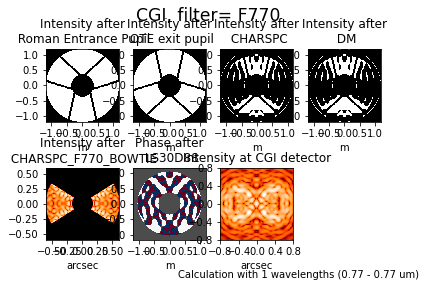

In [3]:
run_matrix.calc()